### IMPORTS

In [2]:
# IMPORTS
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *
import imblearn as imb

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# to split the data
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from custom_adaboost import *

# to evaluate the models
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.model_selection import learning_curve, cross_val_score, KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


# Some functions
from utils import *

### ***2. Machine Learning Methods:***
#### 2.1. Apply at least 3 different machine learning methods
##### Apply at least 3 different machine learning methods on your selected problem. The methods should be selected from the ones covered in the course. None of the methods are allowed to be deep learning. For each method, you should test the effect of the hyperparameters and try to find a set of hyperparameter values that work well for your problem 
##### 2.2. You should apply all the concepts you learned in the course (such as Generalization and Combating Overfitting)
Our problem is a binary classification problem , and the labels are in the target column => Supervised Learning and Classification

#### Split Data to Train & Test

In [3]:
# Read the original dataset
dataset = pd.read_csv('./dataset/final_dataset.csv')

# separate the features and labels
labels = dataset['Diabetes_binary']
features = dataset.drop('Diabetes_binary', axis=1)

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Read the resampled dataset
resampled_dataset = pd.read_csv('./dataset/resampled_dataset.csv')

# separate the features and labels
labels_resampled = resampled_dataset['Diabetes_binary']
features_resampled = resampled_dataset.drop('Diabetes_binary', axis=1)

x_train_resampled, x_test_resampled, y_train_resampled, y_test_resampled = train_test_split(features_resampled, labels_resampled, test_size=0.3, random_state=42)

##### Method 2: SVM

##### A-Simple Model and data

In [3]:
#################################################### Model Training ####################################################
#default parameters

svm_model = LinearSVC(random_state=42)
svm_model.fit(x_train, y_train)

LinearSVC(random_state=42)

Training Accuracy: 0.8616930215794927
Testing Accuracy: 0.8636996741301377
Confusion Matrix: 
 [[65493   112]
 [10261   238]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      1.00      0.93     65605
           1       0.68      0.02      0.04     10499

    accuracy                           0.86     76104
   macro avg       0.77      0.51      0.49     76104
weighted avg       0.84      0.86      0.80     76104



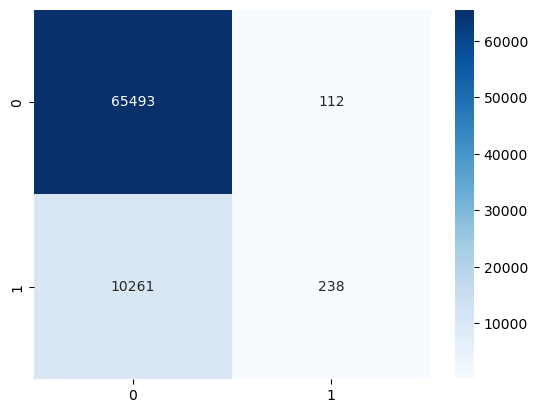

In [5]:
#################################################### Model Evaluation ####################################################
# Evaluate model
y_pred_train = svm_model.predict(x_train)
y_pred_test = svm_model.predict(x_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Confusion Matrix: \n", conf_matrix)
print("Classification Report: \n", class_report)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.show()

#ROC-AUC Curve
# predict probabilities and keep postive outcomes only
# Calibrate the model by training on a validation set using cross-validation to get probability estimates by "sigmoid" (Platt scaling) or "isotonic regression".
# from sklearn.calibration import CalibratedClassifierCV
# calibrated_svc = CalibratedClassifierCV(svm_model)  
# calibrated_svc.fit(x_train, y_train)
# probs = svm_model.predict_proba(x_test)
# probs = probs[:, 1]

# # AUC
# auc = roc_auc_score(y_test, probs)
# print('AUC: %.3f' % auc)

# # ROC
# fpr, tpr, thresholds = roc_curve(y_test, probs)
# # plot no skill
# plt.plot([0, 1], [0, 1], linestyle='--')
# # plot the roc curve for the model
# plt.plot(fpr, tpr, marker='.')
# plt.show()


##### B-Simple Model and Balanced data

In [6]:
#################################################### Model Training ####################################################
#default parameters

svm_model = LinearSVC(random_state=42)
svm_model.fit(x_train_resampled, y_train_resampled)


LinearSVC(random_state=42)

Training Accuracy: 0.7370504503266627
Testing Accuracy: 0.7408111388462684
Confusion Matrix: 
 [[45397 20197]
 [13757 51650]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.69      0.73     65594
           1       0.72      0.79      0.75     65407

    accuracy                           0.74    131001
   macro avg       0.74      0.74      0.74    131001
weighted avg       0.74      0.74      0.74    131001



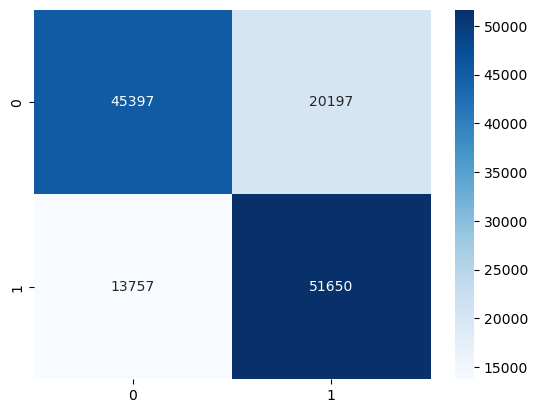

In [7]:
#################################################### Model Evaluation ####################################################
# Evaluate model
y_pred_train = svm_model.predict(x_train_resampled)
y_pred_test = svm_model.predict(x_test_resampled)

train_accuracy = accuracy_score(y_train_resampled, y_pred_train)
test_accuracy = accuracy_score(y_test_resampled, y_pred_test)
conf_matrix = confusion_matrix(y_test_resampled, y_pred_test)
class_report = classification_report(y_test_resampled, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Confusion Matrix: \n", conf_matrix)
print("Classification Report: \n", class_report)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.show()

#ROC-AUC Curve
# predict probabilities and keep postive outcomes only
# Calibrate the model by training on a validation set using cross-validation to get probability estimates by "sigmoid" (Platt scaling) or "isotonic regression".
# from sklearn.calibration import CalibratedClassifierCV
# calibrated_svc = CalibratedClassifierCV(svm_model)  
# calibrated_svc.fit(x_train, y_train)
# probs = svm_model.predict_proba(x_test)
# probs = probs[:, 1]

# # AUC
# auc = roc_auc_score(y_test, probs)
# print('AUC: %.3f' % auc)

# # ROC
# fpr, tpr, thresholds = roc_curve(y_test, probs)
# # plot no skill
# plt.plot([0, 1], [0, 1], linestyle='--')
# # plot the roc curve for the model
# plt.plot(fpr, tpr, marker='.')
# plt.show()


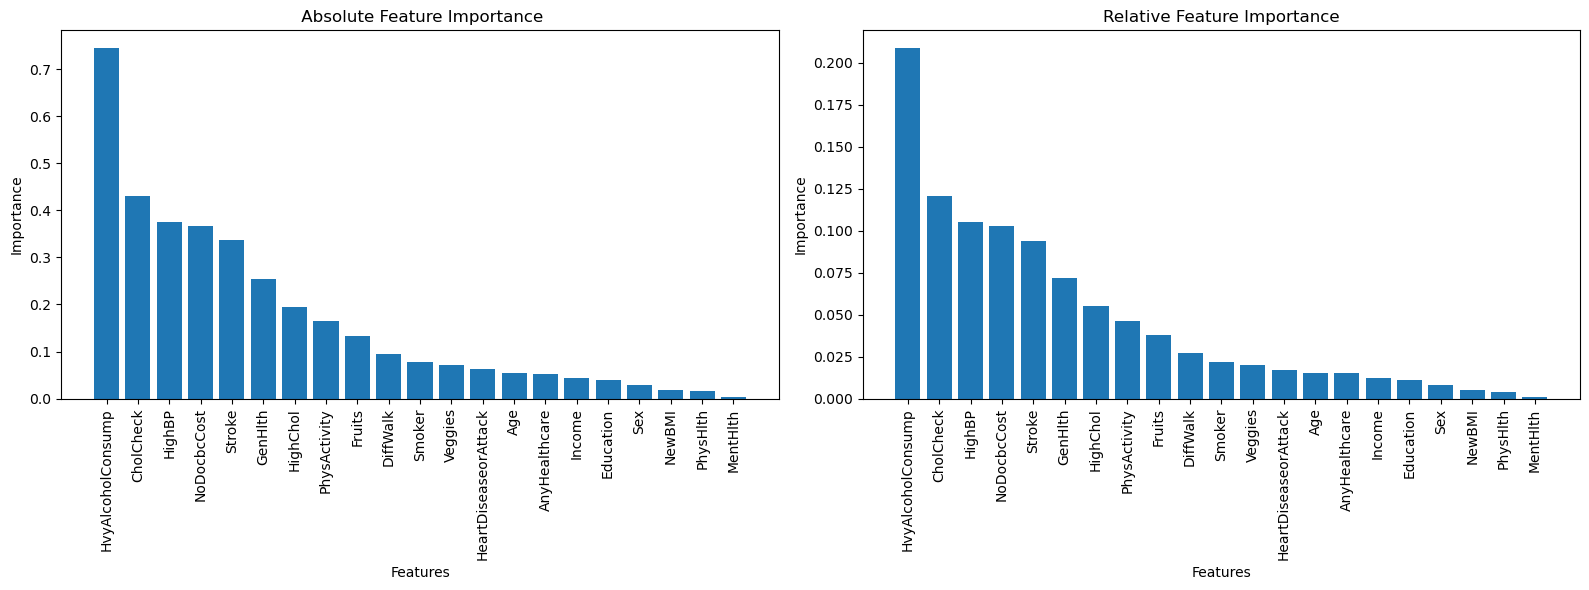

In [8]:
#################################################### Feature's Importance ####################################################
#1-Absolute Feature Importance
feature_importance = {}
for idx, feature_name in enumerate(features):
	importance = abs(svm_model.coef_[0][idx]).round(3)  # Get the absolute value of the coefficient
	feature_importance[feature_name] = importance
sorted_feature_importance = dict(sorted(feature_importance.items(), key=lambda item: item[1], reverse=True))

# Extract feature names and importances
features_plot_x = list(sorted_feature_importance.keys())
importances_plot_y = list(sorted_feature_importance.values())

plt.figure(figsize=(16, 6))  
plt.subplot(1, 2, 1) 
plt.bar(features_plot_x, importances_plot_y)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title(' Absolute Feature Importance')

#2-Relative Feature Importance
# Calculate total importance
total_importance = sum(importances_plot_y)
relative_importances = [(importance / total_importance).round(3) for importance in importances_plot_y]

plt.subplot(1, 2, 2)
plt.bar(features_plot_x, relative_importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Relative Feature Importance')

plt.tight_layout() 
plt.show()

# print("Feature Importance (Absolute): ", relative_importances)

## B-Tuned Model

#### 1. class_weight
Weights associated with classes. This parameter is particularly useful for imbalanced datasets.

Training Accuracy: 0.7370929802693781
Testing Accuracy: 0.7408951076709338
Confusion Matrix: 
 [[45425 20169]
 [13774 51633]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.69      0.73     65594
           1       0.72      0.79      0.75     65407

    accuracy                           0.74    131001
   macro avg       0.74      0.74      0.74    131001
weighted avg       0.74      0.74      0.74    131001



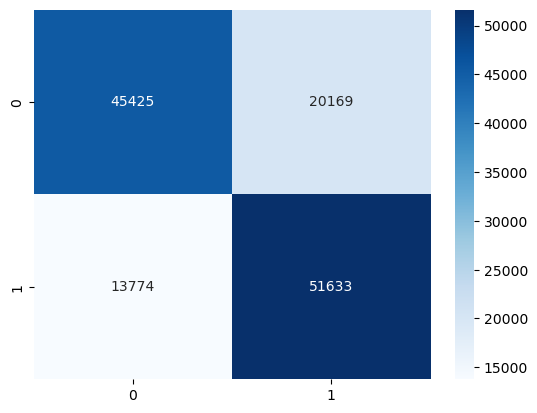

In [3]:
#################################################### Model Training ####################################################
svm_model = LinearSVC(class_weight='balanced',random_state=42)
svm_model.fit(x_train_resampled, y_train_resampled)
y_pred_train = svm_model.predict(x_train_resampled)
y_pred_test = svm_model.predict(x_test_resampled)

train_accuracy = accuracy_score(y_train_resampled, y_pred_train)
test_accuracy = accuracy_score(y_test_resampled, y_pred_test)
conf_matrix = confusion_matrix(y_test_resampled, y_pred_test)
class_report = classification_report(y_test_resampled, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Confusion Matrix: \n", conf_matrix)
print("Classification Report: \n", class_report)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.show()


#### 2. penalty
Specifies the norm used in the penalization. The ‘l2’ penalty is the standard used in SVC. 

{‘l1’, ‘l2’}, l1 isn't supported with squared hinge

	default=’l2’

#### 3. loss
Specifies the loss function. ‘hinge’ is the standard SVM loss (used e.g. by the SVC class) while ‘squared_hinge’ is the square of the hinge loss. The combination of penalty='l1' and loss='hinge' is not supported.

{‘hinge’, ‘squared_hinge’}
		
	default=’squared_hinge’

In [6]:
print("Training with Penalty:'l2', Loss: 'squared_hinge'")
svm_model = LinearSVC(penalty= 'l2',loss='hinge',class_weight='balanced',random_state=42)
svm_model.fit(x_train_resampled, y_train_resampled)

y_pred_train = svm_model.predict(x_train_resampled)
y_pred_test = svm_model.predict(x_test_resampled)

train_accuracy = accuracy_score(y_train_resampled, y_pred_train)
test_accuracy = accuracy_score(y_test_resampled, y_pred_test)
conf_matrix = confusion_matrix(y_test_resampled, y_pred_test)
print("Training Accuracy:%.4f" % (train_accuracy*100))    
print("Testing Accuracy:%.4f" % (test_accuracy*100))
print('----------------------------------------------------------------')

print("Training with Penalty:'l2', Loss: 'hinge'")
svm_model = LinearSVC(penalty= 'l2',loss='hinge',class_weight='balanced',random_state=42)
svm_model.fit(x_train_resampled, y_train_resampled)

y_pred_train = svm_model.predict(x_train_resampled)
y_pred_test = svm_model.predict(x_test_resampled)

train_accuracy = accuracy_score(y_train_resampled, y_pred_train)
test_accuracy = accuracy_score(y_test_resampled, y_pred_test)
conf_matrix = confusion_matrix(y_test_resampled, y_pred_test)
print("Training Accuracy:%.4f" % (train_accuracy*100))    
print("Testing Accuracy:%.4f" % (test_accuracy*100))
print('----------------------------------------------------------------')


Training with Penalty:'l2', Loss: 'squared_hinge'
Training Accuracy:73.7548
Testing Accuracy:74.1101
----------------------------------------------------------------
Training with Penalty:'l2', Loss: 'hinge'
Training Accuracy:73.7548
Testing Accuracy:74.1101
----------------------------------------------------------------
Training with Penalty:'l1', Loss: 'squared_hinge'


ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

#### 3. C
 Inverse of regularization strength; smaller values specify stronger regularization. Regularization helps prevent overfitting by penalizing large coefficients.
 
	default=1.0

In [11]:
Cs = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
for c in Cs:
    print(f"Training with C (Inverse regularization strength): {c}")
    svm_model = LinearSVC(C=c,penalty= 'l2',loss='squared_hinge',class_weight='balanced',random_state=42)
    svm_model.fit(x_train_resampled, y_train_resampled)
    
    y_pred_train = svm_model.predict(x_train_resampled)
    y_pred_test = svm_model.predict(x_test_resampled)

    train_accuracy = accuracy_score(y_train_resampled, y_pred_train)
    test_accuracy = accuracy_score(y_test_resampled, y_pred_test)
    conf_matrix = confusion_matrix(y_test_resampled, y_pred_test)
    print("Training Accuracy:%.4f" % (train_accuracy*100))    
    print("Testing Accuracy:%.4f" % (test_accuracy*100))
    print('----------------------------------------------------------------')

Training with C (Inverse regularization strength): 0.1
Training Accuracy:73.9013
Testing Accuracy:74.1414
----------------------------------------------------------------
Training with C (Inverse regularization strength): 0.2
Training Accuracy:73.8526
Testing Accuracy:74.1155
----------------------------------------------------------------
Training with C (Inverse regularization strength): 0.3
Training Accuracy:73.8182
Testing Accuracy:74.1086
----------------------------------------------------------------
Training with C (Inverse regularization strength): 0.4
Training Accuracy:73.3007
Testing Accuracy:73.5536
----------------------------------------------------------------
Training with C (Inverse regularization strength): 0.5
Training Accuracy:73.9079
Testing Accuracy:74.2368
----------------------------------------------------------------
Training with C (Inverse regularization strength): 0.6
Training Accuracy:73.7165
Testing Accuracy:74.0720
---------------------------------------

# Final Model

#### Normal Data

In [3]:
svm_model = LinearSVC(C=1,penalty= 'l2',loss='squared_hinge',class_weight='balanced',random_state=42)
svm_model.fit(x_train, y_train)

y_pred_train = svm_model.predict(x_train)
y_pred_test = svm_model.predict(x_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Training Accuracy:%.4f" % (train_accuracy*100))    
print("Testing Accuracy:%.4f" % (test_accuracy*100))
print('----------------------------------------------------------------')

Training Accuracy:68.0452
Testing Accuracy:67.9885
----------------------------------------------------------------


Confusion Matrix: 
 [[43642 21963]
 [ 2399  8100]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.67      0.78     65605
           1       0.27      0.77      0.40     10499

    accuracy                           0.68     76104
   macro avg       0.61      0.72      0.59     76104
weighted avg       0.85      0.68      0.73     76104



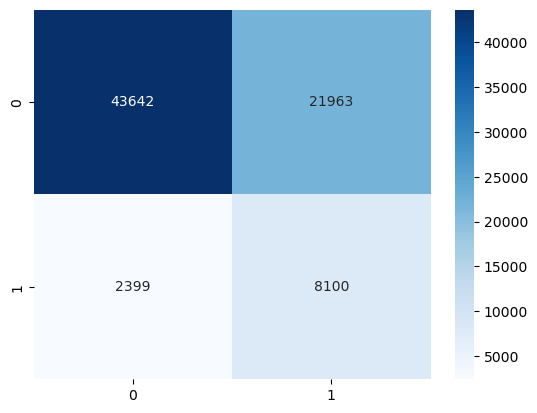

In [4]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)


print("Confusion Matrix: \n", conf_matrix)
print("Classification Report: \n", class_report)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.show()

#### Balanced Data

In [4]:
svm_model = LinearSVC(C=1,penalty= 'l2',loss='squared_hinge',class_weight='balanced',random_state=42)
svm_model.fit(x_train_resampled, y_train_resampled)

y_pred_train = svm_model.predict(x_train_resampled)
y_pred_test = svm_model.predict(x_test_resampled)

train_accuracy = accuracy_score(y_train_resampled, y_pred_train)
test_accuracy = accuracy_score(y_test_resampled, y_pred_test)
conf_matrix = confusion_matrix(y_test_resampled, y_pred_test)
print("Training Accuracy:%.4f" % (train_accuracy*100))    
print("Testing Accuracy:%.4f" % (test_accuracy*100))
print('----------------------------------------------------------------')

Training Accuracy:73.7093
Testing Accuracy:74.0895
----------------------------------------------------------------


Confusion Matrix: 
 [[45425 20169]
 [13774 51633]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.69      0.73     65594
           1       0.72      0.79      0.75     65407

    accuracy                           0.74    131001
   macro avg       0.74      0.74      0.74    131001
weighted avg       0.74      0.74      0.74    131001



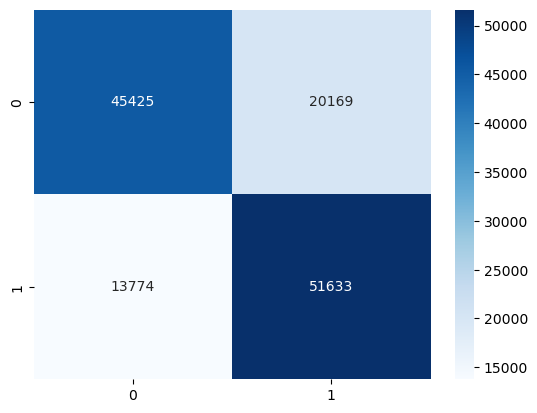

In [6]:
conf_matrix = confusion_matrix(y_test_resampled, y_pred_test)
class_report = classification_report(y_test_resampled, y_pred_test)


print("Confusion Matrix: \n", conf_matrix)
print("Classification Report: \n", class_report)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.show()

#### Cross Validation

In [7]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(svm_model, features, labels, cv=kf)
print(f"Accuracy after applying cross validation: {scores.mean():.5f} (+/- {scores.std():.5f})")

Accuracy after applying cross validation: 0.75705 (+/- 0.10294)


In [6]:
from sklearn.metrics import make_scorer, f1_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(f1_score)
f1_scores = cross_val_score(svm_model, features, labels, cv=kf, scoring=scorer)
print(f"F1 Score after applying cross-validation: {f1_scores.mean():.5f} (+/- {f1_scores.std():.5f})")

F1 Score after applying cross-validation: 0.39459 (+/- 0.02963)


#### Balanced Data

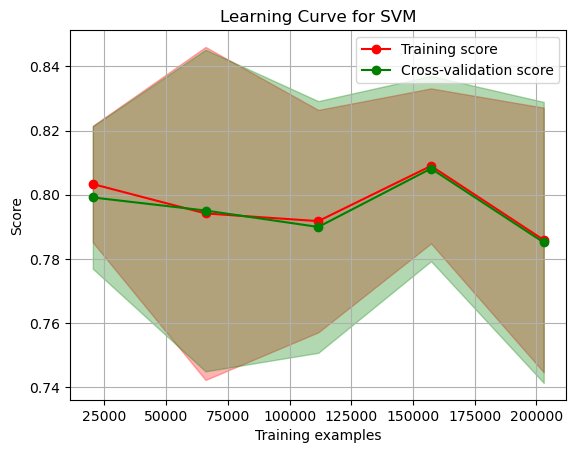

In [7]:
# Get the learning curve plot
train_sizes, train_scores, test_scores = learning_curve(svm_model, features, labels, cv=5,
                                                            train_sizes=np.linspace(.1, 1.0, 5),
                                                            scoring='f1_weighted', shuffle=True, random_state=42)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve for SVM")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
					train_scores_mean + train_scores_std, alpha=0.3, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
					test_scores_mean + test_scores_std, alpha=0.3, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
			label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
			label="Cross-validation score")

plt.legend(loc='best')
plt.show()

In [ ]:
# Model's Features Dependencies
# '''
# This is to show the relationship between a feature and the model's predictions (with all other features constant)

# '''
from sklearn.inspection import PartialDependenceDisplay
fig, ax = plt.subplots(figsize=(15, 20), )
target_class = 0  # specify the target class
PartialDependenceDisplay.from_estimator(
	svm_model, features, features.columns, ax=ax, target=target_class)

# Increase spacing between subplots
fig.subplots_adjust(wspace=0.3, hspace=0.3)
fig.suptitle(f'Partial Dependence Plots for SVM (Target Class: {target_class})')
fig.tight_layout()
plt.show()


In [ ]:
# Model's Features Dependencies
# '''
# This is to show the relationship between a feature and the model's predictions (with all other features constant)

# '''
from sklearn.inspection import PartialDependenceDisplay
fig, ax = plt.subplots(figsize=(15, 20), )
target_class = 1  # specify the target class
PartialDependenceDisplay.from_estimator(
	svm_model, features, features.columns, ax=ax, target=target_class)

# Increase spacing between subplots
fig.subplots_adjust(wspace=0.3, hspace=0.3)
fig.suptitle(f'Partial Dependence Plots for SVM (Target Class: {target_class})')
fig.tight_layout()
plt.show()